# Gestion des imports

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [58]:
# %pip install -U scikit-learn

In [59]:
from sklearn.preprocessing import OneHotEncoder

# Chargement du CSV et vérification des infos

In [60]:
# Charger les fichiers des données covid et localisations
df = pd.read_csv('full_clean_covid_19.csv')
locations = pd.read_csv('full_clean_locations.csv')

# Afficher les informations des dataframes
print("Informations du dataframe covid:")
print(df.info())
print("\nInformations du dataframe locations:")
print(locations.info())

Informations du dataframe covid:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730307 entries, 0 to 2730306
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   observation_date  object 
 1   country           object 
 2   province_state    object 
 3   city              object 
 4   total_cases       int64  
 5   new_cases         float64
 6   total_deaths      float64
 7   new_deaths        float64
 8   total_recovered   float64
 9   active_cases      float64
dtypes: float64(5), int64(1), object(4)
memory usage: 208.3+ MB
None

Informations du dataframe locations:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4163 entries, 0 to 4162
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   iso3            4163 non-null   object 
 1   city            3223 non-null   object 
 2   province_state  3966 non-null   object 
 3   country_region  4163 non-null   object 

In [61]:
import pandas as pd

# Charger les fichiers des données covid et localisations
df = pd.read_csv('full_clean_covid_19.csv')
locations = pd.read_csv('full_clean_locations.csv')

# Print columns before merge for debugging
print("Columns in df:", df.columns.tolist())
print("Columns in locations:", locations.columns.tolist())

# Intégrer les colonnes 'population' et 'who_region' dans le dataframe principal
# Merger les two dataframes on the common geographic columns
df = df.merge(locations[['country_region', 'province_state', 'city', 'population', 'who_region']],
              left_on=['country', 'province_state', 'city'], # Use 'country' from df
              right_on=['country_region', 'province_state', 'city'], # Use 'country_region' from locations
              how='left')

# Supprimer les colonnes 'country', 'province_state', 'city' from df after merge
df = df.drop(columns=['country', 'province_state', 'city'], errors='ignore')


# Vérifier les informations du nouveau dataframe
print("Informations après intégration:")
print(df.info())
print(f"Forme du dataframe: {df.shape}")

Columns in df: ['observation_date', 'country', 'province_state', 'city', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_recovered', 'active_cases']
Columns in locations: ['iso3', 'city', 'province_state', 'country_region', 'latitude', 'longitude', 'combined_key', 'population', 'who_region']
Informations après intégration:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730307 entries, 0 to 2730306
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   observation_date  object 
 1   total_cases       int64  
 2   new_cases         float64
 3   total_deaths      float64
 4   new_deaths        float64
 5   total_recovered   float64
 6   active_cases      float64
 7   country_region    object 
 8   population        float64
 9   who_region        object 
dtypes: float64(6), int64(1), object(3)
memory usage: 208.3+ MB
None
Forme du dataframe: (2730307, 10)


In [62]:
# Supprimer les enregistrements avec des valeurs nulles dans les colonnes 'population' et 'who_region'
print("Valeurs nulles avant nettoyage:")
print(df[['population', 'who_region']].isnull().sum())

df = df.dropna(subset=['population', 'who_region'])

print(f"Forme après suppression des NaN: {df.shape}")
print("Valeurs nulles après nettoyage:")
print(df[['population', 'who_region']].isnull().sum())

Valeurs nulles avant nettoyage:
population    387
who_region    387
dtype: int64
Forme après suppression des NaN: (2729920, 10)
Valeurs nulles après nettoyage:
population    0
who_region    0
dtype: int64


# Définition d'un lot aléatoire de 5 000 lignes

In [63]:
# Garder 5000 lignes aléatoires
df_simple = df.sample(n=900000, random_state=42)
print(f"Nouveau dataframe: {df_simple.shape}")
print(df_simple.info())

Nouveau dataframe: (900000, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 900000 entries, 669643 to 2230384
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   observation_date  900000 non-null  object 
 1   total_cases       900000 non-null  int64  
 2   new_cases         900000 non-null  float64
 3   total_deaths      900000 non-null  float64
 4   new_deaths        900000 non-null  float64
 5   total_recovered   466672 non-null  float64
 6   active_cases      469681 non-null  float64
 7   country_region    900000 non-null  object 
 8   population        900000 non-null  float64
 9   who_region        900000 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 75.5+ MB
None


# Ajout du taux de mortalité

In [64]:
# Calculer le taux de mortalité dans une nouvelle colonne : "mortality_rate"
df_simple['mortality_rate'] = df_simple['total_deaths'] / df_simple['total_cases']

# Afficher le résultat en pourcentage
df_simple['mortality_rate'] = df_simple['mortality_rate'] * 100

print("Taux de mortalité calculé:")
print(f"Min: {df_simple['mortality_rate'].min():.4f}%")
print(f"Max: {df_simple['mortality_rate'].max():.4f}%")
print(f"Moyenne: {df_simple['mortality_rate'].mean():.4f}%")

# Retirer les deux colonnes 'total_deaths' et 'total_cases'
df_simple = df_simple.drop(columns=['total_deaths', 'total_cases'])
print(f"\nNouvelles dimensions: {df_simple.shape}")
print(df_simple.head())

Taux de mortalité calculé:
Min: 0.0000%
Max: inf%
Moyenne: inf%

Nouvelles dimensions: (900000, 9)
        observation_date  new_cases  new_deaths  total_recovered  \
669643        2020-09-24       44.0         0.0              0.0   
744069        2020-10-13        3.0         0.0              0.0   
1498230       2021-04-23        0.0         0.0          13218.0   
695631        2020-10-01      313.0         0.0              0.0   
830729        2020-11-04        1.0         1.0              0.0   

         active_cases            country_region  population who_region  \
669643         3885.0  United States of America    161075.0   Americas   
744069          252.0  United States of America     11196.0   Americas   
1498230         405.0                Tajikistan   9537642.0     Europe   
695631        23054.0                    Sweden   2377081.0     Europe   
830729           32.0  United States of America      1693.0   Americas   

         mortality_rate  
669643         0.6139

In [65]:
# Afficher les enregistrements où 'mortality_rate' = infinity
infinity_mask = np.isinf(df_simple['mortality_rate'])
print(f"Nombre d'enregistrements avec mortality_rate = infinity: {infinity_mask.sum()}")

if infinity_mask.sum() > 0:
    print("Exemples d'enregistrements avec infinity:")
    print(df_simple[infinity_mask].head())

# Supprimer les enregistrements où 'mortality_rate' = infinity
df_simple = df_simple[~infinity_mask]
print(f"Nouvelles dimensions après suppression: {df_simple.shape}")

Nombre d'enregistrements avec mortality_rate = infinity: 120
Exemples d'enregistrements avec infinity:
       observation_date  new_cases  new_deaths  total_recovered  active_cases  \
192582       2020-05-22        0.0       256.0              0.0           0.0   
111333       2020-04-26        0.0         0.0              0.0           1.0   
16638        2020-03-26        0.0        12.0              0.0           0.0   
112127       2020-04-27        0.0        35.0              0.0           0.0   
60630        2020-04-10        0.0         9.0              0.0           0.0   

                  country_region  population who_region  mortality_rate  
192582            United Kingdom  55977200.0     Europe             inf  
111333  United States of America      5737.0   Americas             inf  
16638             United Kingdom   3138600.0     Europe             inf  
112127            United Kingdom   3138600.0     Europe             inf  
60630             United Kingdom   18816

# Ajout des jours, mois, années et saisons

In [66]:
# Transformer la colonne 'observation_date' en plusieurs colonnes : 'month' (string) et 'season' (string)

# On (re)convertit en datetime par sécurité
df_simple['observation_date'] = pd.to_datetime(df_simple['observation_date'])

# On crée une nouvelle colonne 'day' dans laquelle on extrait le jour de la date
df_simple['day'] = df_simple['observation_date'].dt.day

# Dictionnaire des mois en français
mois_francais = {
    1: 'Janvier', 2: 'Février', 3: 'Mars', 4: 'Avril',
    5: 'Mai', 6: 'Juin', 7: 'Juillet', 8: 'Août',
    9: 'Septembre', 10: 'Octobre', 11: 'Novembre', 12: 'Décembre'
}

# On crée une nouvelle colonne 'month' dans laquelle on extrait le mois de la date en string
df_simple['month'] = df_simple['observation_date'].dt.month.map(mois_francais)

# On créer une nouvelle colonne 'year' dans laquelle on extrait l'année de la date
df_simple['year'] = df_simple['observation_date'].dt.year

# On crée une nouvelle colonne 'day_of_week' dans laquelle on extrait le jour de la semaine (0 = lundi, 6 = dimanche)
df_simple['day_of_week'] = df_simple['observation_date'].dt.dayofweek

# Fonction pour déterminer la saison
def obtenir_saison(date):
    month = date.month
    day = date.day

    if (month == 3 and day >= 21) or month in [4, 5] or (month == 6 and day <= 20):
        return 'spring'
    elif (month == 6 and day >= 21) or month in [7, 8] or (month == 9 and day <= 20):
        return 'summer'
    elif (month == 9 and day >= 21) or month in [10, 11] or (month == 12 and day <= 20):
        return 'autumn'
    else:
        return 'winter'

# On crée une nouvelle colonne 'season' en fonction de la date d'observation
df_simple['season'] = df_simple['observation_date'].apply(obtenir_saison)

# On supprime la colonne 'observation_date'
df_simple = df_simple.drop(columns=['observation_date'])

print("Nouvelles colonnes temporelles créées:")
print(f"Colonnes: {df_simple.columns.tolist()}")
print(f"Dimensions: {df_simple.shape}")
print(df_simple.head())

Nouvelles colonnes temporelles créées:
Colonnes: ['new_cases', 'new_deaths', 'total_recovered', 'active_cases', 'country_region', 'population', 'who_region', 'mortality_rate', 'day', 'month', 'year', 'day_of_week', 'season']
Dimensions: (899880, 13)
         new_cases  new_deaths  total_recovered  active_cases  \
669643        44.0         0.0              0.0        3885.0   
744069         3.0         0.0              0.0         252.0   
1498230        0.0         0.0          13218.0         405.0   
695631       313.0         0.0              0.0       23054.0   
830729         1.0         1.0              0.0          32.0   

                   country_region  population who_region  mortality_rate  day  \
669643   United States of America    161075.0   Americas        0.613968   24   
744069   United States of America     11196.0   Americas        0.000000   13   
1498230                Tajikistan   9537642.0     Europe        0.663555   23   
695631                     Sweden  

# Gestion des valeurs quantitatives manquantes (NaN)

In [67]:
# Identifier les valeurs Nan dans les colonnes quantitatives
print("Valeurs NaN par colonne:")
print(df_simple.isnull().sum())

# Identifier les colonnes quantitatives
colonnes_numeriques = df_simple.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nColonnes numériques: {colonnes_numeriques}")

Valeurs NaN par colonne:
new_cases               0
new_deaths              0
total_recovered    433328
active_cases       430319
country_region          0
population              0
who_region              0
mortality_rate       8896
day                     0
month                   0
year                    0
day_of_week             0
season                  0
dtype: int64

Colonnes numériques: ['new_cases', 'new_deaths', 'total_recovered', 'active_cases', 'population', 'mortality_rate', 'day', 'year', 'day_of_week']


Imputer les valeurs quantitatives NaN par la moyenne ou la médiane de la colonne : 'total_recovered', 'active_cases'
Justifier ce choix

In [68]:
# On regarde la distribution de la colonne 'total_recovered' en calculant la moyenne, la médiane, les écarts-types et les quantiles Q1 Q2 Q3
if 'total_recovered' in df_simple.columns:
    print("Distribution de 'total_recovered':")
    print(f"Moyenne: {df_simple['total_recovered'].mean():.2f}")
    print(f"Médiane: {df_simple['total_recovered'].median():.2f}")
    print(f"Écart-type: {df_simple['total_recovered'].std():.2f}")
    print(f"Q1: {df_simple['total_recovered'].quantile(0.25):.2f}")
    print(f"Q2 (médiane): {df_simple['total_recovered'].quantile(0.5):.2f}")
    print(f"Q3: {df_simple['total_recovered'].quantile(0.75):.2f}")

    # Imputer par la médiane (plus robuste aux outliers)
    df_simple['total_recovered'] = df_simple['total_recovered'].fillna(df_simple['total_recovered'].median())
    print(f"\nValeurs NaN de 'total_recovered' imputées avec la médiane")

Distribution de 'total_recovered':
Moyenne: 15739.25
Médiane: 0.00
Écart-type: 128362.13
Q1: 0.00
Q2 (médiane): 0.00
Q3: 0.00

Valeurs NaN de 'total_recovered' imputées avec la médiane


In [69]:
# On regarde la distribution de la colonne 'active_cases' en calculant la moyenne, la médiane, les écarts-types et les quantiles Q1 Q2 Q3
if 'active_cases' in df_simple.columns:
    print("Distribution de 'active_cases':")
    print(f"Moyenne: {df_simple['active_cases'].mean():.2f}")
    print(f"Médiane: {df_simple['active_cases'].median():.2f}")
    print(f"Écart-type: {df_simple['active_cases'].std():.2f}")
    print(f"Q1: {df_simple['active_cases'].quantile(0.25):.2f}")
    print(f"Q2 (médiane): {df_simple['active_cases'].quantile(0.5):.2f}")
    print(f"Q3: {df_simple['active_cases'].quantile(0.75):.2f}")

    # Imputer par la médiane (plus robuste aux outliers)
    df_simple['active_cases'] = df_simple['active_cases'].fillna(df_simple['active_cases'].median())
    print(f"\nValeurs NaN de 'active_cases' imputées avec la médiane")

Distribution de 'active_cases':
Moyenne: 11960.01
Médiane: 488.00
Écart-type: 219755.82
Q1: 61.00
Q2 (médiane): 488.00
Q3: 2314.00

Valeurs NaN de 'active_cases' imputées avec la médiane


In [70]:
# On vérifie qu'il n'y a plus de NaN
print("Vérification - Valeurs NaN restantes:")
print(df_simple.isnull().sum())
print(f"\nTotal des NaN dans le dataframe: {df_simple.isnull().sum().sum()}")

Vérification - Valeurs NaN restantes:
new_cases             0
new_deaths            0
total_recovered       0
active_cases          0
country_region        0
population            0
who_region            0
mortality_rate     8896
day                   0
month                 0
year                  0
day_of_week           0
season                0
dtype: int64

Total des NaN dans le dataframe: 8896


# Transformation des valeurs strings en booléens

In [71]:
# Utilisation de pandas get_dummies pour transformer toutes les valeurs strings en booléens
print("Colonnes avant transformation:")
print(df_simple.dtypes)

# Transformer les variables catégorielles en variables dummy
df_simple = pd.get_dummies(df_simple, drop_first=True)

print(f"\nDimensions après transformation: {df_simple.shape}")
print("\nColonnes après transformation:")
print(df_simple.columns.tolist())

# Convertir les colonnes booléennes en entiers (0 et 1)
colonnes_bool = df_simple.select_dtypes(include=['bool']).columns
if len(colonnes_bool) > 0:
    df_simple[colonnes_bool] = df_simple[colonnes_bool].astype(int)
    print(f"\n{len(colonnes_bool)} colonnes booléennes converties en entiers")

Colonnes avant transformation:
new_cases          float64
new_deaths         float64
total_recovered    float64
active_cases       float64
country_region      object
population         float64
who_region          object
mortality_rate     float64
day                  int32
month               object
year                 int32
day_of_week          int32
season              object
dtype: object

Dimensions après transformation: (899880, 223)

Colonnes après transformation:
['new_cases', 'new_deaths', 'total_recovered', 'active_cases', 'population', 'mortality_rate', 'day', 'year', 'day_of_week', 'country_region_Albania', 'country_region_Algeria', 'country_region_Andorra', 'country_region_Angola', 'country_region_Antigua and Barbuda', 'country_region_Argentina', 'country_region_Armenia', 'country_region_Australia', 'country_region_Austria', 'country_region_Azerbaijan', 'country_region_Bahamas', 'country_region_Bahrain', 'country_region_Bangladesh', 'country_region_Barbados', 'country_regi

# Standardisation des valeurs

In [72]:
# Utilisation de StandardScaler pour standardiser les valeurs quantitatives non booléennes SAUF 'mortality_rate'

# Identifier toutes les colonnes numériques
colonnes_numeriques = df_simple.select_dtypes(include=np.number).columns.tolist()

# Retirer la variable cible 'mortality_rate' de la liste
colonnes_a_standardiser = [col for col in colonnes_numeriques if col != 'mortality_rate']

print(f"Colonnes à standardiser: {len(colonnes_a_standardiser)}")

# Vérifier et nettoyer les valeurs infinies
df_simple[colonnes_a_standardiser] = df_simple[colonnes_a_standardiser].replace([np.inf, -np.inf], np.nan)
df_simple[colonnes_a_standardiser] = df_simple[colonnes_a_standardiser].fillna(df_simple[colonnes_a_standardiser].median())

# Appliquer la standardisation
scaler = StandardScaler()
df_simple[colonnes_a_standardiser] = scaler.fit_transform(df_simple[colonnes_a_standardiser])

print("Standardisation appliquée avec succès!")
print(f"Dimensions finales: {df_simple.shape}")

# Supprimer les colonnes constantes (qui n'apportent pas d'information)
df_simple = df_simple.loc[:, df_simple.nunique() > 1]
print(f"Dimensions après suppression des colonnes constantes: {df_simple.shape}")

Colonnes à standardiser: 222
Standardisation appliquée avec succès!
Dimensions finales: (899880, 223)
Dimensions après suppression des colonnes constantes: (899880, 223)


# Modèle de régression linéaire multiple
- Séparer le jeu de données en train et test (70% train, 30% test) /!\ mettre shuffle=true (on mélange les données avant de les séparer pour éviter un biais temporel)
- Lancer le modèle
- On fait un ajustement avec .fit()
- Ressortir un tableau qui reprend pour chaque variable explicative ses différents coefficients (beta1, 2, 3...) -> savoir ce qui joue le plus grand rôle dans la variation du taux de mortalité
- Calculer et afficher le R2 du modèle

In [73]:
# Séparer le jeu de données en variables explicatives (X) et variable cible (y)
# Supprimer les lignes avec des valeurs NaN dans la colonne 'mortality_rate'
df_cleaned = df_simple.dropna(subset=['mortality_rate'])

Y = df_cleaned['mortality_rate']  # Variable cible : taux de mortalité
X = df_cleaned.drop(columns=['mortality_rate'])  # Variables explicatives

print(f"Variables explicatives (X): {X.shape}")
print(f"Variable cible (Y): {Y.shape}")

# Train test split avec shuffle=true (70% train, 30% test)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, shuffle=True, random_state=42
)

print(f"X_train: {X_train.shape}, Y_train: {Y_train.shape}")
print(f"X_test: {X_test.shape}, Y_test: {Y_test.shape}")

# Initialiser le Modèle de régression linéaire multiple avec .fit() pour l'ajustement
model = LinearRegression()
model.fit(X_train, Y_train)
print("Modèle ajusté avec succès!")

# On fait des prédictions sur le jeu de test
Y_pred = model.predict(X_test)
print(f"Prédictions effectuées: {len(Y_pred)} valeurs")

# Ressortir un tableau qui reprend pour chaque variable explicative ses différents coefficients
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient (β)': model.coef_
}).sort_values(by='Coefficient (β)', key=abs, ascending=False)

print("\nTop 15 des variables les plus influentes:")
print(coefficients.head(15))

# Calculer et afficher le R2 du modèle
r2 = r2_score(Y_test, Y_pred)
print(f"\nScore R² du modèle: {r2:.4f}")
print(f"Le modèle explique {r2*100:.2f}% de la variance du taux de mortalité")

Variables explicatives (X): (890984, 222)
Variable cible (Y): (890984,)
X_train: (623688, 222), Y_train: (623688,)
X_test: (267296, 222), Y_test: (267296,)
Modèle ajusté avec succès!
Prédictions effectuées: 267296 valeurs

Top 15 des variables les plus influentes:
                             Variable  Coefficient (β)
205                 who_region_Europe         0.710879
121             country_region_Mexico         0.667215
145               country_region_Peru         0.514180
6                                year        -0.423026
203               who_region_Americas         0.396477
200              country_region_Yemen         0.303230
151             country_region_Russia        -0.257991
204  who_region_Eastern Mediterranean         0.230752
214                         month_Mai         0.216282
196            country_region_Vanuatu         0.178271
213                        month_Juin         0.165693
23             country_region_Belgium        -0.155817
208                 

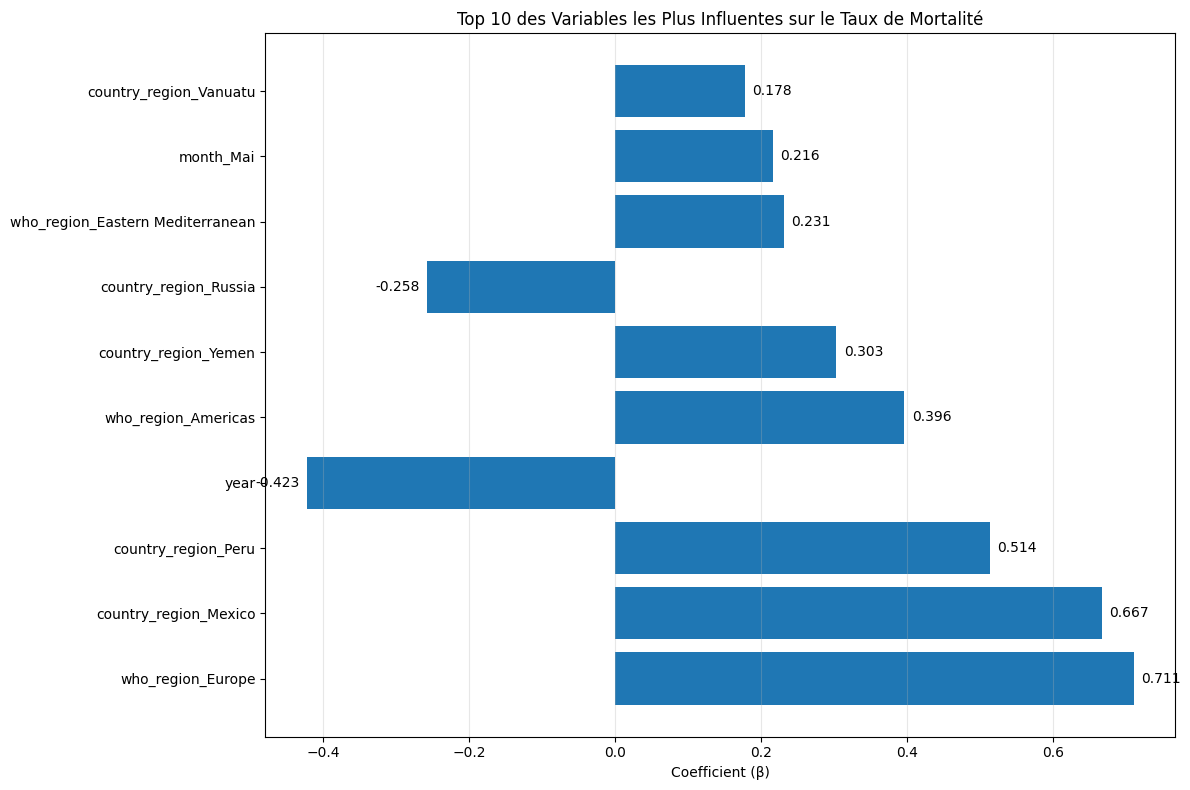

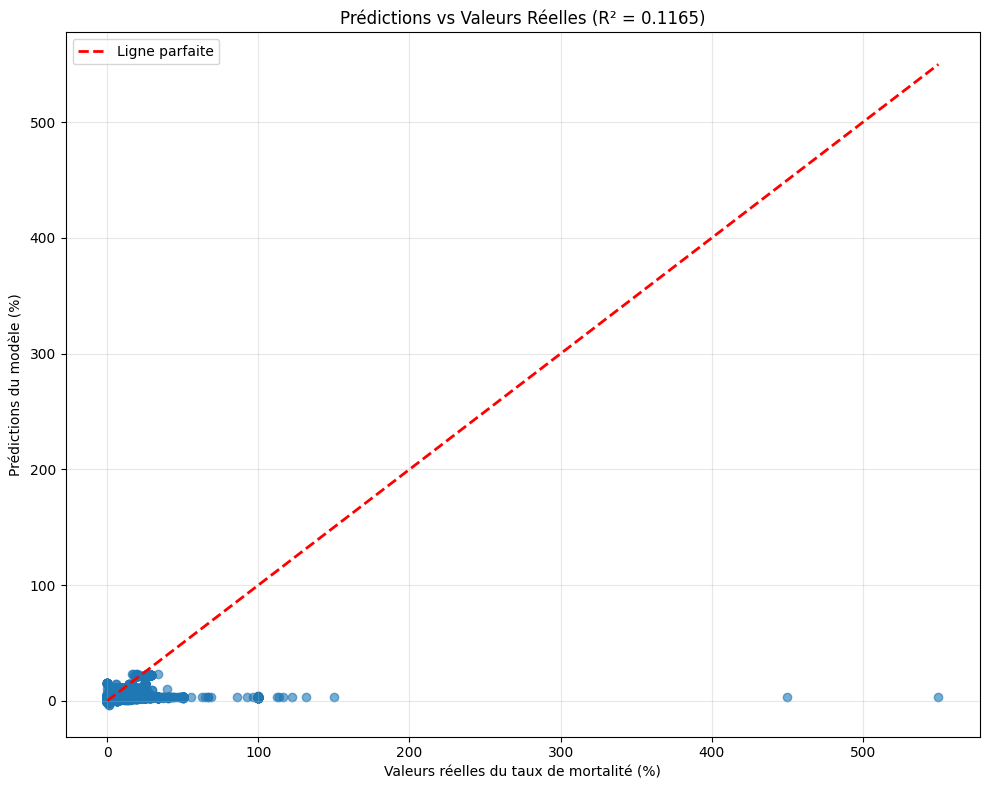

In [74]:
# Afficher graphiquement les 10 coefficients les plus importants
top_10_coefficients = coefficients.head(10)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_10_coefficients)), top_10_coefficients['Coefficient (β)'])
plt.yticks(range(len(top_10_coefficients)), top_10_coefficients['Variable'])
plt.xlabel('Coefficient (β)')
plt.title('Top 10 des Variables les Plus Influentes sur le Taux de Mortalité')
plt.grid(axis='x', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, v in enumerate(top_10_coefficients['Coefficient (β)']):
    plt.text(v + (0.01 if v >= 0 else -0.01), i, f'{v:.3f}',
             ha='left' if v >= 0 else 'right', va='center')

plt.tight_layout()
plt.show()

# Graphique de comparaison prédictions vs valeurs réelles
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred, alpha=0.6)
plt.xlabel("Valeurs réelles du taux de mortalité (%)")
plt.ylabel("Prédictions du modèle (%)")
plt.title(f"Prédictions vs Valeurs Réelles (R² = {r2:.4f})")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2, label='Ligne parfaite')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()